# WeatherPy

### Observations
1. Reported humidity, cloudiness and wind speed are often imprecise, with horizontal lines forming in the scatter plot around multiples of 5.
1. The northern hemisphere is experiencing summer, and it is visible in the temperature skew between cities in the northern and southern hemispheres the same distance from the equator.
1. There seems to be little correlation between cloudiness and latitude.

In [1]:
import json
import pandas as pd
from matplotlib import pyplot as plt
import openweathermapy.core as owm
from config import api_key

In [2]:
settings = {"appid": api_key, 'units': 'imperial'}

Get OpenWeatherMap's [city list](http://bulk.openweathermap.org/sample/city.list.json.gz) data to sample from by ID. I just reread the instructions and realized I was not supposed to do it this way, but I don't have time to fix it :/

In [3]:
city_data = []

with open('./city.list.json') as f:
    city_data = json.load(f)
    

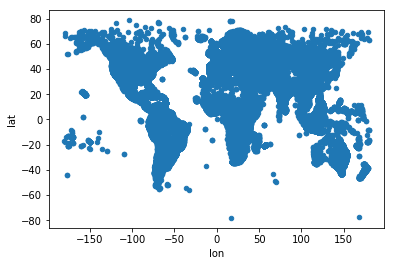

In [4]:
coords = [city['coord'] for city in city_data]
coord_df = pd.DataFrame(coords)
coord_df.plot(kind='scatter', x='lon', y='lat')
plt.show()

I wanted to plot the data just to see whether there was anything interesting. I decided to exclude the two cities below latitude -70 as outliers. Not only might they skew the results but the axis range for latitude might change significantly from run to run.

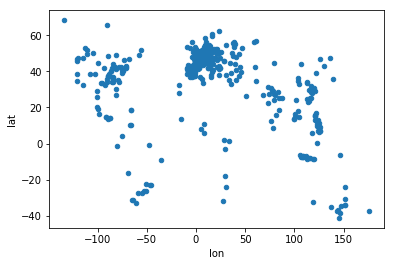

In [18]:
city_ids = pd.DataFrame([{'id': city['id'], 'lat': city['coord']['lat'], 'lon': city['coord']['lon']} for city in city_data])
city_ids = city_ids[city_ids['lat'] > -70]
city_sample = city_ids.sample(500)
city_sample.plot(kind='scatter', x='lon', y='lat')
plt.show()

In [6]:
# Get the JSON responses from OWM based on City ID
sample_data = []

for city in city_sample['id'].astype(int):
    sample_data.append(owm.get_current(city, **settings))

In [7]:
# Create dataframe from dicts
df_data = []
for city in sample_data:
    city_weather = {}
    city_weather['lat'] = city['coord']['lat']
    city_weather['temp'] = city['main']['temp']
    city_weather['humidity'] = city['main']['humidity']
    city_weather['cloudiness'] = city['clouds']['all']
    city_weather['wind_speed'] = city['wind']['speed']
    df_data.append(city_weather)

weather_df = pd.DataFrame(df_data)

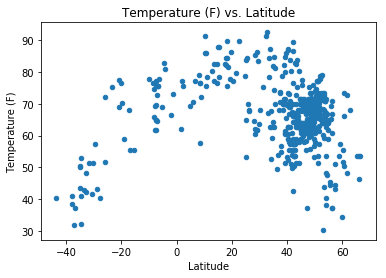

In [8]:
weather_df.plot(kind='scatter', x='lat', y='temp')
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
plt.title('Temperature (F) vs. Latitude')
plt.show()

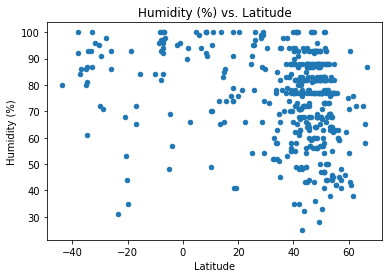

In [9]:
weather_df.plot(kind='scatter', x='lat', y='humidity')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Humidity (%) vs. Latitude')
plt.show()

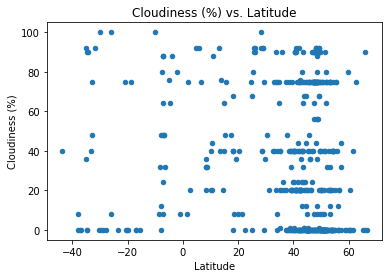

In [10]:
weather_df.plot(kind='scatter', x='lat', y='cloudiness')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Cloudiness (%) vs. Latitude')
plt.show()

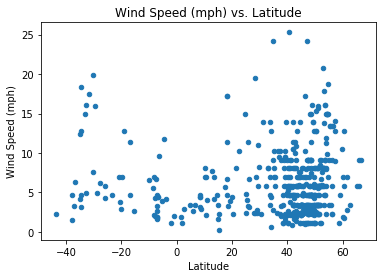

In [11]:
weather_df.plot(kind='scatter', x='lat', y='wind_speed')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('Wind Speed (mph) vs. Latitude')
plt.show()